In [ ]:
#First, I install all the libraries needed to get Tesla shares
!pip install yfinance
!pip install pandas
!pip install plotly

In [5]:
#Then import functions specificaly for this task
import yfinance as yf
import pandas as pd
import plotly.express as px

In [6]:
#Here I'm using yfinance API to get Tesla Stock Data from https://finance.yahoo.com/
Tesla = yf.Ticker('TSLA')
#And here it is converted to a data frame using.history method
tesla_stock = Tesla.history(period="1y")
tesla_stock.reset_index(inplace=True)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-09-19 00:00:00-04:00,300.089996,309.839996,297.799988,309.070007,60231200,0,0
1,2022-09-20 00:00:00-04:00,306.910004,313.329987,305.579987,308.730011,61642800,0,0
2,2022-09-21 00:00:00-04:00,308.290009,313.799988,300.630005,300.799988,62555700,0,0
3,2022-09-22 00:00:00-04:00,299.859985,301.290009,285.820007,288.589996,70545400,0,0
4,2022-09-23 00:00:00-04:00,283.089996,284.500000,272.820007,275.329987,63748400,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



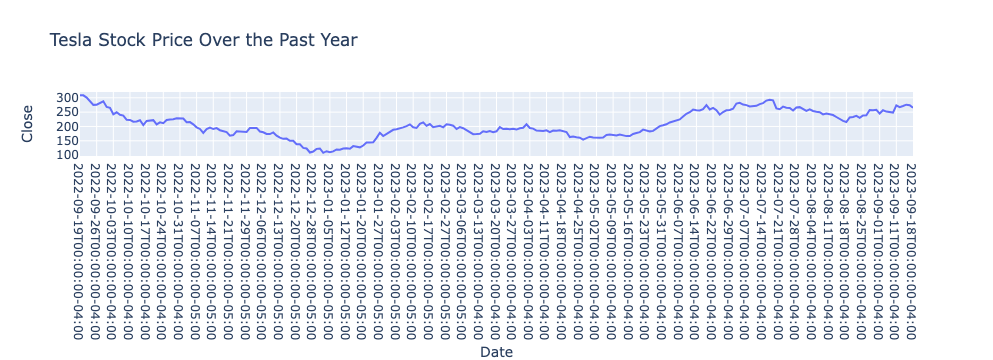

In [8]:
#It's time to have fun and explore interactive chart, to see how Tesla's doing. Would you invest?
fig = px.line(tesla_stock, x='Date', y='Close', title='Tesla Stock Price Over the Past Year')
fig.update_xaxes(type='category') 

In [ ]:
#Here we install all the necessary libraries to get Tesla revenue info
!pip install bs4
!pip install html5lib
!pip install --upgrade pandas
!pip install plotly

In [10]:
#It is important to load all functions needed for webscrapping and visualisation
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px

In [11]:
#Here we use .get method to access the website content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm" 
html_data = requests.get(url).text

In [12]:
#With a little help of tags and HTML knowledge we can cook...beautiful soup!
soup = BeautifulSoup(html_data)
rows = soup.find("tbody").find_all("tr")
tesla_revenue = []
for row in rows:
    columns = row.find_all("td")
    date = columns[0].text
    revenue = columns[1].text
    tesla_revenue.append({"Date": date, "Revenue": revenue})
tesla_revenue = pd.DataFrame(tesla_revenue)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna=True
tesla_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


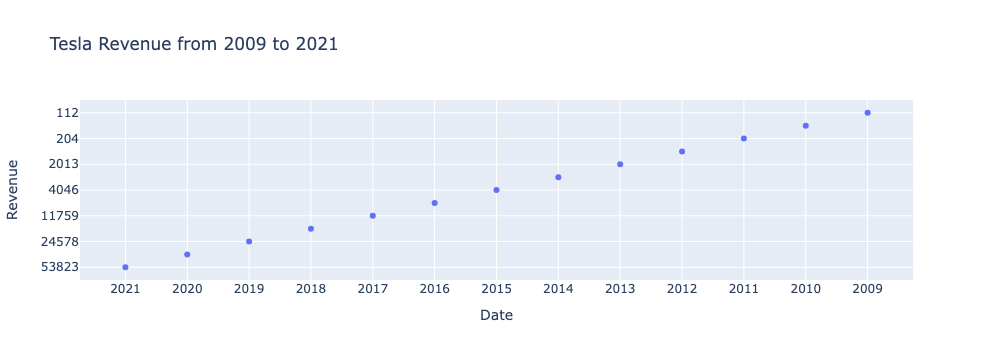

In [14]:
#It's time to see how good is Tesla in terms of profitability...and make final decision:invest or not invest!
fig = px.scatter(tesla_revenue, x='Date', y='Revenue', title='Tesla Revenue from 2009 to 2021')
fig.update_xaxes(type='category') 